In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.transforms import ToTensor, ToPILImage, Resize
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PIL import Image
from collections import defaultdict
import random
from siamese import siamese_conv, Contrastive_loss

In [4]:
HEIGHT, WIDTH = 100, 160

transform = transforms.Compose([
    ToTensor(),
    Resize((HEIGHT, WIDTH))])

ORIGINAL_DATA_PATH = '../data/signatures/full_org/'
forged_DATA_PATH = '../data/signatures/full_forg/'

original = defaultdict(list)
forged = defaultdict(list)

class_idx = 0
counter = 0

for f1, f2 in zip(sorted(os.listdir(ORIGINAL_DATA_PATH)), sorted(os.listdir(forged_DATA_PATH))):
    img = Image.open(ORIGINAL_DATA_PATH+f1)
    original[class_idx].append(1-transform(img)[0].unsqueeze(0))
    img = Image.open(forged_DATA_PATH+f2)
    forged[class_idx].append(1-transform(img)[0].unsqueeze(0))
    counter = (counter+1)%24
    class_idx += 1 if not counter else 0


In [5]:
class dataloader:
    def __init__(self, original, forged, num):
        self.original = original
        self.forged = forged
        self.num = num
    
    def __getitem__(self, idx):
        # for _ in range(self.num):
        idx = random.randint(0, 11)
        img1 = random.choice(original[idx])
        if random.random() < 0.5:
            img2 = random.choice(original[idx])
            target = 0
        else:
            img2 = random.choice(forged[idx])
            if random.random() < 0.25:
                if random.random() < 0.25:
                    img2 = random.choice(forged[random.randint(0, 11)])
                else:
                    new_idx = random.randint(0, 11)
                    while new_idx == idx:
                        new_idx = random.randint(0, 11)
                    img2 = random.choice(original[new_idx])
            target = 1
        return (img1, img2, target)
    
    def __len__(self):
        return self.num

data = dataloader(original, forged, 640)

In [6]:
train = DataLoader(data, 64, shuffle=True)


In [7]:
model = siamese_conv(HEIGHT, WIDTH)
EPOCHS = 100
optimizer = optim.Adam(model.parameters())

In [8]:
for i in tqdm(range(EPOCHS)):
    running_loss = 0
    for s1, s2, target in train:
        out1 = model.forward(s1)
        out2 = model.forward(s2)
        loss = Contrastive_loss(target, 1, 1, out1, out2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*64
    running_loss /= data.__len__()
    print(f'loss: {running_loss}')

  1%|          | 1/100 [00:08<14:27,  8.76s/it]

loss: 37.26073875427246


  2%|▏         | 2/100 [00:16<13:13,  8.09s/it]

loss: 11.408294439315796


  3%|▎         | 3/100 [00:23<12:37,  7.81s/it]

loss: 6.874318933486938


  4%|▍         | 4/100 [00:31<12:05,  7.56s/it]

loss: 5.388271808624268


  5%|▌         | 5/100 [00:38<11:41,  7.38s/it]

loss: 4.21841938495636


  6%|▌         | 6/100 [00:45<11:22,  7.26s/it]

loss: 3.8136409163475036


  7%|▋         | 7/100 [00:52<11:12,  7.23s/it]

loss: 3.115492653846741


  8%|▊         | 8/100 [01:00<11:22,  7.42s/it]

loss: 2.7248496890068052


  9%|▉         | 9/100 [01:08<11:32,  7.61s/it]

loss: 2.4535243630409242


 10%|█         | 10/100 [01:15<11:28,  7.65s/it]

loss: 2.535320794582367


 11%|█         | 11/100 [01:23<11:18,  7.62s/it]

loss: 2.1616557598114015


 12%|█▏        | 12/100 [01:30<10:59,  7.50s/it]

loss: 1.3469889044761658


 13%|█▎        | 13/100 [01:38<10:59,  7.58s/it]

loss: 1.663314825296402


 14%|█▍        | 14/100 [01:45<10:48,  7.54s/it]

loss: 1.5217776894569397


 15%|█▌        | 15/100 [01:53<10:36,  7.49s/it]

loss: 1.206190639734268


 16%|█▌        | 16/100 [02:00<10:32,  7.53s/it]

loss: 1.055757549405098


 17%|█▋        | 17/100 [02:08<10:23,  7.52s/it]

loss: 1.156613552570343


 18%|█▊        | 18/100 [02:15<10:16,  7.52s/it]

loss: 1.254264485836029


 19%|█▉        | 19/100 [02:23<10:02,  7.43s/it]

loss: 0.7093738049268723


 20%|██        | 20/100 [02:30<10:01,  7.52s/it]

loss: 0.7470728993415833


 21%|██        | 21/100 [02:38<09:59,  7.59s/it]

loss: 0.5773195922374725


 22%|██▏       | 22/100 [02:46<09:56,  7.65s/it]

loss: 0.6376255482435227


 23%|██▎       | 23/100 [02:54<10:06,  7.87s/it]

loss: 0.6916031777858734


 24%|██▍       | 24/100 [03:02<09:53,  7.82s/it]

loss: 0.5006684809923172


 25%|██▌       | 25/100 [03:10<09:50,  7.87s/it]

loss: 0.5693421274423599


 26%|██▌       | 26/100 [03:18<09:40,  7.84s/it]

loss: 0.46684809029102325


 27%|██▋       | 27/100 [03:26<09:31,  7.83s/it]

loss: 0.45465314090251924


 28%|██▊       | 28/100 [03:33<09:21,  7.79s/it]

loss: 0.46342807412147524


 29%|██▉       | 29/100 [03:41<09:18,  7.86s/it]

loss: 0.30915378481149675


 30%|███       | 30/100 [03:49<09:12,  7.89s/it]

loss: 0.32585357427597045


 31%|███       | 31/100 [03:57<09:03,  7.88s/it]

loss: 0.3413696736097336


 32%|███▏      | 32/100 [04:05<08:50,  7.80s/it]

loss: 0.41376977413892746


 33%|███▎      | 33/100 [04:13<08:48,  7.89s/it]

loss: 0.40974645018577577


 34%|███▍      | 34/100 [04:21<08:39,  7.87s/it]

loss: 0.3989935517311096


 35%|███▌      | 35/100 [04:28<08:29,  7.83s/it]

loss: 0.3341811984777451


 36%|███▌      | 36/100 [04:37<08:27,  7.94s/it]

loss: 0.3241650819778442


 37%|███▋      | 37/100 [04:44<08:16,  7.88s/it]

loss: 0.35495763272047043


 38%|███▊      | 38/100 [04:52<08:01,  7.77s/it]

loss: 0.3491300895810127


 39%|███▉      | 39/100 [04:59<07:51,  7.73s/it]

loss: 0.33571560233831405


 40%|████      | 40/100 [05:07<07:43,  7.73s/it]

loss: 0.2720509424805641


 41%|████      | 41/100 [05:15<07:36,  7.75s/it]

loss: 0.268720643222332


 42%|████▏     | 42/100 [05:22<07:21,  7.61s/it]

loss: 0.9729436203837395


 43%|████▎     | 43/100 [05:30<07:14,  7.62s/it]

loss: 0.6285746335983277


 44%|████▍     | 44/100 [05:37<07:00,  7.51s/it]

loss: 0.5446653187274932


 45%|████▌     | 45/100 [05:45<06:53,  7.51s/it]

loss: 0.4802909344434738


 46%|████▌     | 46/100 [05:52<06:42,  7.46s/it]

loss: 0.480598983168602


 47%|████▋     | 47/100 [05:59<06:33,  7.42s/it]

loss: 0.38328534066677095


 48%|████▊     | 48/100 [06:07<06:23,  7.37s/it]

loss: 0.36522795259952545


 49%|████▉     | 49/100 [06:14<06:15,  7.36s/it]

loss: 0.27116517871618273


 50%|█████     | 50/100 [06:21<06:05,  7.32s/it]

loss: 0.29533642828464507


 51%|█████     | 51/100 [06:29<06:00,  7.36s/it]

loss: 0.24184224456548692


 52%|█████▏    | 52/100 [06:36<05:54,  7.39s/it]

loss: 0.24066926389932633


 53%|█████▎    | 53/100 [06:44<05:48,  7.42s/it]

loss: 0.2702097609639168


 54%|█████▍    | 54/100 [06:51<05:40,  7.40s/it]

loss: 0.23214164078235627


 55%|█████▌    | 55/100 [06:58<05:33,  7.41s/it]

loss: 0.28831004351377487


 56%|█████▌    | 56/100 [07:06<05:25,  7.40s/it]

loss: 0.2522450178861618


 57%|█████▋    | 57/100 [07:13<05:18,  7.40s/it]

loss: 0.19349950253963472


 58%|█████▊    | 58/100 [07:20<05:09,  7.37s/it]

loss: 0.21809649989008903


 59%|█████▉    | 59/100 [07:28<05:01,  7.34s/it]

loss: 0.20943406522274016


 60%|██████    | 60/100 [07:35<04:55,  7.39s/it]

loss: 0.16008322760462762


 61%|██████    | 61/100 [07:43<04:49,  7.43s/it]

loss: 0.1630771279335022


 62%|██████▏   | 62/100 [07:51<04:46,  7.54s/it]

loss: 0.15946763455867768


 63%|██████▎   | 63/100 [07:58<04:38,  7.54s/it]

loss: 0.1876974180340767


 64%|██████▍   | 64/100 [08:05<04:27,  7.43s/it]

loss: 0.15140310376882554


 65%|██████▌   | 65/100 [08:13<04:18,  7.38s/it]

loss: 0.14290903136134148


 66%|██████▌   | 66/100 [08:20<04:11,  7.40s/it]

loss: 0.14350471496582032


 67%|██████▋   | 67/100 [08:28<04:08,  7.52s/it]

loss: 0.12921655029058457


 68%|██████▊   | 68/100 [08:35<03:59,  7.49s/it]

loss: 0.12387126162648202


 69%|██████▉   | 69/100 [08:42<03:49,  7.39s/it]

loss: 0.11235458105802536


 70%|███████   | 70/100 [08:50<03:44,  7.47s/it]

loss: 0.12064153328537941


 71%|███████   | 71/100 [08:58<03:38,  7.54s/it]

loss: 0.11967197805643082


 72%|███████▏  | 72/100 [09:05<03:29,  7.49s/it]

loss: 0.134064881503582


 73%|███████▎  | 73/100 [09:12<03:19,  7.39s/it]

loss: 0.1402279607951641


 74%|███████▍  | 74/100 [09:20<03:11,  7.38s/it]

loss: 0.14096909016370773


 75%|███████▌  | 75/100 [09:27<03:06,  7.46s/it]

loss: 0.12175652757287025


 76%|███████▌  | 76/100 [09:35<02:57,  7.40s/it]

loss: 0.13535127863287927


 77%|███████▋  | 77/100 [09:42<02:49,  7.38s/it]

loss: 0.1459452286362648


 78%|███████▊  | 78/100 [09:49<02:41,  7.34s/it]

loss: 0.1576484687626362


 79%|███████▉  | 79/100 [09:56<02:33,  7.30s/it]

loss: 0.1599526435136795


 80%|████████  | 80/100 [10:04<02:25,  7.29s/it]

loss: 0.14717625305056573


 81%|████████  | 81/100 [10:11<02:19,  7.36s/it]

loss: 0.16056615710258484


 82%|████████▏ | 82/100 [10:19<02:14,  7.47s/it]

loss: 0.174656692892313


 83%|████████▎ | 83/100 [10:26<02:07,  7.48s/it]

loss: 0.1765369914472103


 84%|████████▍ | 84/100 [10:33<01:58,  7.38s/it]

loss: 0.16095023974776268


 85%|████████▌ | 85/100 [10:41<01:51,  7.41s/it]

loss: 0.1757676787674427


 86%|████████▌ | 86/100 [10:48<01:43,  7.39s/it]

loss: 0.18213985189795495


 87%|████████▋ | 87/100 [10:56<01:36,  7.38s/it]

loss: 0.17652761414647103


 88%|████████▊ | 88/100 [11:03<01:27,  7.32s/it]

loss: 0.12903284654021263


 89%|████████▉ | 89/100 [11:10<01:20,  7.34s/it]

loss: 0.1288999430835247


 90%|█████████ | 90/100 [11:18<01:13,  7.36s/it]

loss: 0.09669750556349754


 91%|█████████ | 91/100 [11:25<01:06,  7.36s/it]

loss: 0.1003573015332222


 92%|█████████▏| 92/100 [11:32<00:59,  7.39s/it]

loss: 0.10402601920068263


 93%|█████████▎| 93/100 [11:40<00:51,  7.38s/it]

loss: 0.12764210626482964


 94%|█████████▍| 94/100 [11:47<00:44,  7.43s/it]

loss: 0.12412999346852302


 95%|█████████▌| 95/100 [11:55<00:37,  7.48s/it]

loss: 0.14857667088508605


 96%|█████████▌| 96/100 [12:03<00:30,  7.51s/it]

loss: 0.14847353100776672


 97%|█████████▋| 97/100 [12:10<00:22,  7.47s/it]

loss: 0.148466257750988


 98%|█████████▊| 98/100 [12:18<00:15,  7.56s/it]

loss: 0.14651303142309188


 99%|█████████▉| 99/100 [12:25<00:07,  7.45s/it]

loss: 0.14371282681822778


100%|██████████| 100/100 [12:32<00:00,  7.53s/it]

loss: 0.13480463325977327


In [9]:
with torch.no_grad():
    img1 = original[3][4].unsqueeze(0)
    img2 = original[3][1].unsqueeze(0)
    img3 = original[4][0].unsqueeze(0)
    img4 = forged[3][14].unsqueeze(0)

    out1 = model.forward(img1)
    out2 = model.forward(img2)
    out3 = model.forward(img3)
    out4 = model.forward(img4)

    print(torch.pairwise_distance(out1, out2, 2))
    print(torch.pairwise_distance(out1, out3, 2))
    print(torch.pairwise_distance(out1, out4, 2))

tensor([0.3138])
tensor([13.1332])
tensor([11.8422])


For reference here are the images of signatures being tested above

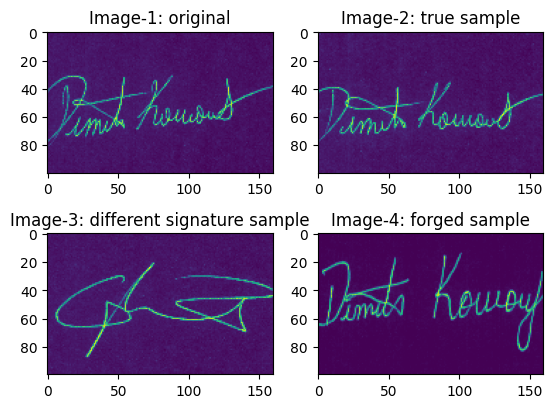

In [13]:
fig, ax = plt.subplots(2,2)
ax[0][0].imshow(img1.squeeze(0).squeeze(0))
ax[0][0].set_title('Image-1: original')

ax[0][1].imshow(img2.squeeze(0).squeeze(0))
ax[0][1].set_title('Image-2: true sample')

ax[1][0].imshow(img3.squeeze(0).squeeze(0))
ax[1][0].set_title('Image-3: different signature sample')

ax[1][1].imshow(img4.squeeze(0).squeeze(0))
ax[1][1].set_title('Image-4: forged sample')

plt.show()

In [15]:
torch.save(model, "../Saved Models/siamese.pth")

In [20]:
def check(original, sample):
    original = 1-transform(original)[0].unsqueeze(0).unsqueeze(0)
    sample = 1-transform(sample)[0].unsqueeze(0).unsqueeze(0)
    with torch.no_grad():
        out1 = model.forward(original)
        out2 = model.forward(sample)
        distance = torch.pairwise_distance(out1, out2, 2)
        return "fake" if distance > 1 else "genuine"

In [21]:
org = Image.open('../data/signatures/original.jpg')
fake = Image.open('../data/signatures/forged.jpg')

check(org, fake)

'fake'